<a href="https://colab.research.google.com/github/FDorj/Data-Visualization/blob/main/Bar_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploratory

In [1]:
# download dataset
!wget https://raw.githubusercontent.com/Njmondoa/Superstore-Sales-Analysis/main/SuperStore_data.csv

--2024-08-03 10:46:49--  https://raw.githubusercontent.com/Njmondoa/Superstore-Sales-Analysis/main/SuperStore_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2300789 (2.2M) [text/plain]
Saving to: ‘SuperStore_data.csv’

SuperStore_data.csv 100%[===================>]   2.19M  --.-KB/s    in 0.05s   

2024-08-03 10:46:50 (43.4 MB/s) - ‘SuperStore_data.csv’ saved [2300789/2300789]



In [2]:
import pandas as pd
df = pd.read_csv('SuperStore_data.csv')

In [3]:
df.shape

(10296, 21)

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10296 non-null  object 
 1   Order ID       10296 non-null  object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quanti

In [7]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology', nan], dtype=object)

In [13]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office', nan], dtype=object)

In [9]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East', nan], dtype=object)

## Bar Chart

In [18]:
import matplotlib.pyplot as plt
from numpy import size
import seaborn as sns

Sales by Category Horizontal Bar Chart

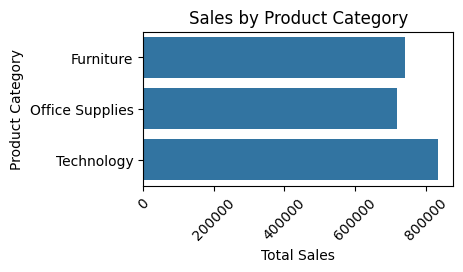

In [17]:
sales_by_category = df.groupby('Category')['Sales'].sum()

plt.figure(figsize = (4,2), dpi = 100)
sns.barplot(x = sales_by_category.values, y = sales_by_category.index, orient = 'h')
plt.title('Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.xticks(rotation = 45)
plt.show()

Profit by Region Vertical Bar Chart

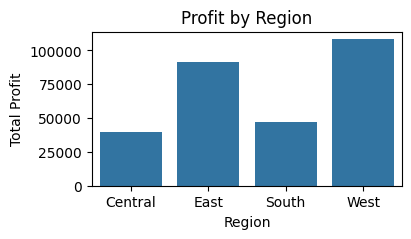

In [24]:
profit_by_region = df.groupby('Region')['Profit'].sum()

plt.figure(figsize = (4,2), dpi = 100)
sns.barplot(x = profit_by_region.index, y = profit_by_region.values, orient = 'v')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

## Clustered Bar Chart

In [25]:
import matplotlib.pyplot as plt
from numpy import size
import seaborn as sns

Total Sales for each Segment in each Region

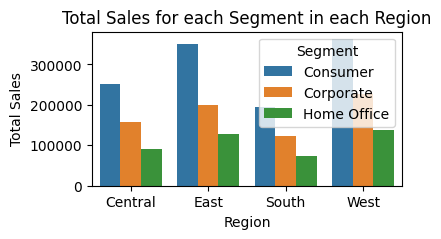

In [37]:
sales_by_segment_region = df.groupby(['Segment', 'Region'])['Sales'].sum().reset_index()

plt.figure(figsize = (4,2), dpi = 100)
sns.barplot(x = 'Region', y = 'Sales', hue = 'Segment', orient = 'v', data = sales_by_segment_region)
plt.title('Total Sales for each Segment in each Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

Total Sales and Profits by Product Category

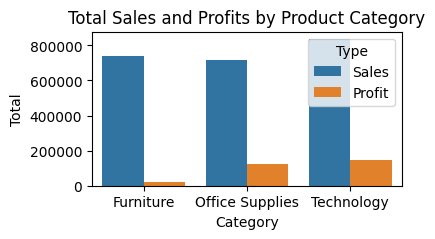

In [41]:
sales_and_profits_by_category = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

melted_data = pd.melt(sales_and_profits_by_category, id_vars="Category", value_name="Total", var_name="Type")

plt.figure(figsize = (4,2), dpi = 100)
sns.barplot(x = 'Category', y = 'Total', hue = 'Type', orient = 'v', data = melted_data)
plt.title('Total Sales and Profits by Product Category')
plt.xlabel('Category')
plt.ylabel('Total')
plt.show()